### Section 1 - Defective products

In a manufacturing pipeline products are 3% defective. We are interested in examining a defective product to see what goes wrong on the belt. We need to ask the facility manager to send us a set of independent samples for examination.

#### 1.A

How many independent samples should we ask for in order to have a 85% probability of having at least one defective product in the batch sent?

In [15]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

def min_batch_size (p,neededP): 
    n = math.ceil(np.log(1-neededP)/np.log(1-p))
    return n
result = min_batch_size(0.03,0.85)
print ("The min batch size in this case is {}".format(result))  

The min batch size in this case is 63


Probability of at least 1 defected product in batches sizing 1 to 100 based on created data (with at least 85% certainty):
      prob
61  0.8536
62  0.8550
63  0.8573
64  0.8580
65  0.8598
66  0.8672
67  0.8674
68  0.8730
69  0.8792
70  0.8801
71  0.8893
72  0.8968
73  0.8941
74  0.8978
75  0.9023
76  0.9042
77  0.9084
78  0.9102
79  0.9094
80  0.9120


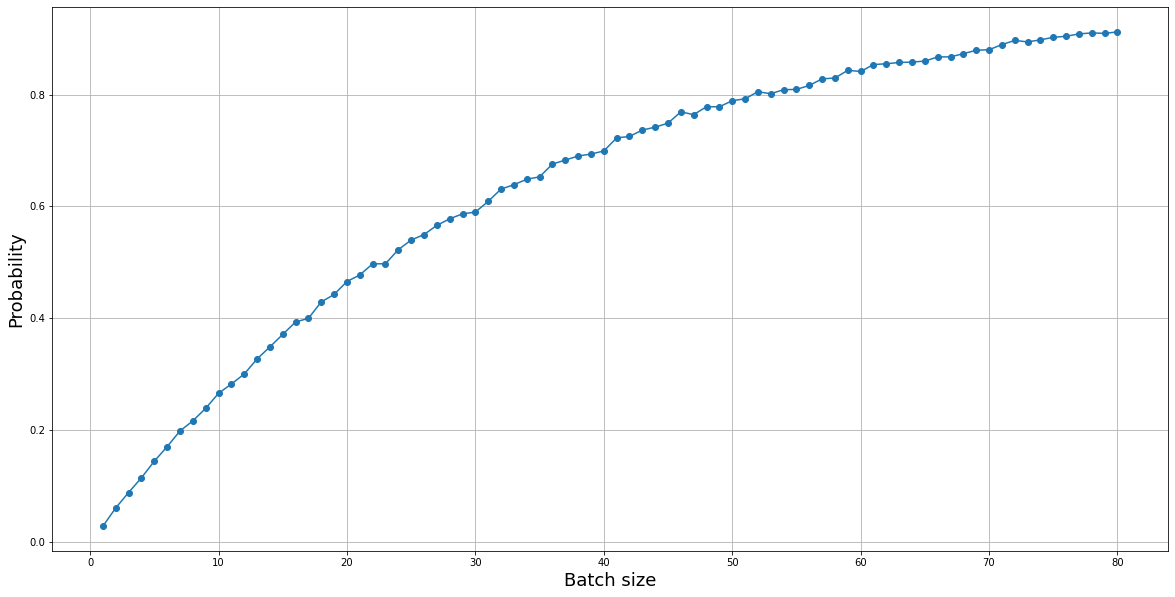

In [16]:
# I compared the result to a database I created to verifiy the result:

def num_of_defected (batch,prob): #returns array counting how many defected pipes were found given a batch size over 10,000 experiments
    defected_count=[]
    for i in range(10000):
        experiment = np.random.randint(1,100,batch)
        defected_count.append(experiment[experiment<=prob*100].shape[0])
    return np.array(defected_count)
def prob_for_defected (n_pipes,min_defected): # returns probability findind at least X defected pipes given Y batch size
    defected_products=num_of_defected(n_pipes,0.03)
    larger_elements = [i for i in defected_products if i >=min_defected]
    number_of_elements = len(larger_elements)
    return number_of_elements/10000
prob_defected=[]
for i in range (1,81):
    prob_defected.append(prob_for_defected(i,1))
num_products = [ i for i in range (1,81)]
df = pd.DataFrame(prob_defected, columns=['prob'], index=num_products)
mask = df['prob'] >= 0.85
print("Probability of at least 1 defected product in batches sizing 1 to 100 based on created data (with at least 85% certainty):")
print(df[mask])
plt.figure(figsize=(20,10))
plt.ylabel("Probability",fontsize=18)
plt.xlabel("Batch size",fontsize=18)
plt.plot(df.index,df['prob'], marker='o')
plt.grid()
plt.show()

#### 1.B
Answer this part again with the following changes: products are 4% defective and we want a 95% probability of at least one defective product in the batch.

In [17]:
min_batch = stats.geom.ppf(0.95,0.04)
print ("The min batch size in this case is {}".format(min_batch))

The min batch size in this case is 74.0


#### 1.C 

Consider the following cases and calculate how many independent samples are required: 

1. Products are 10% defective and we want a 90% probability of at least 5 defective products in the batch.
1. Products are 30% defective and we want a 90% probability of at least 15 defective products in the batch.

Explain the difference between the two results. You should use mathematical reasoning based on the properties of distributions you saw in class and visualizations in your answer.

The required batch size for facility1 is 78.0 
The required batch size for facility2 is 64.0



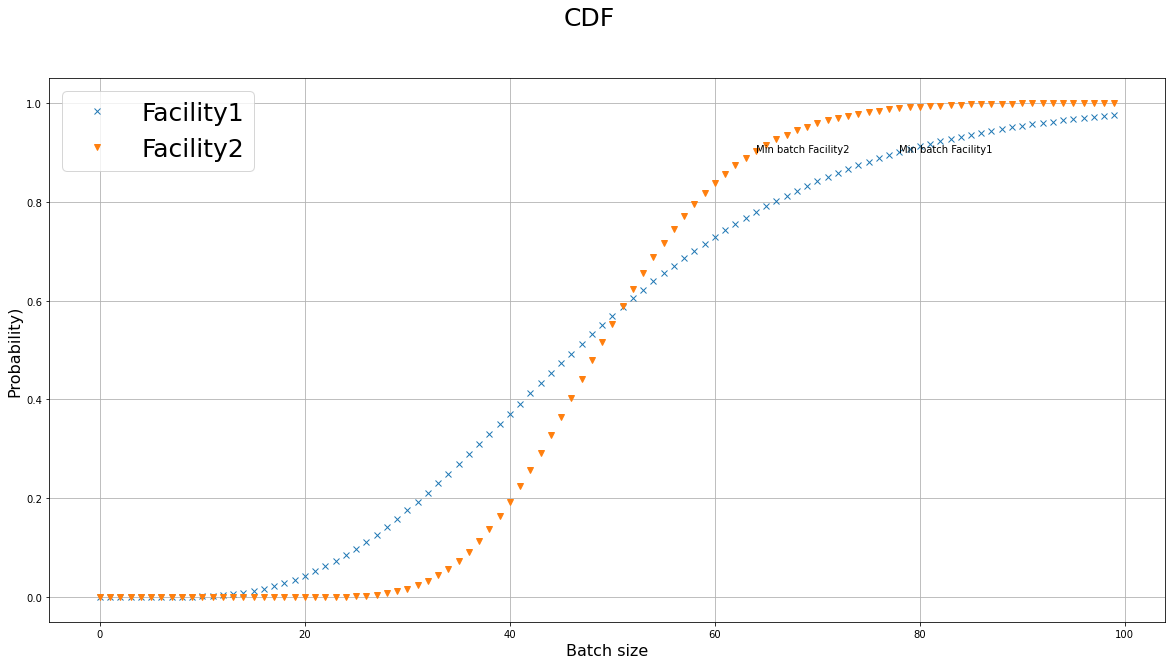

In [18]:
import numpy as np
import pandas as pd
from scipy import stats
prob1 = stats.nbinom(5,0.1,loc=5)
prob2 = stats.nbinom(15,0.3,loc=15)
print("The required batch size for facility1 is {} \nThe required batch size for facility2 is {}\n".format(prob1.ppf(0.9),prob2.ppf(0.9)))
i = np.arange(0,100,1)
y1 = prob1.cdf([x for x in i])
y2 = prob2.cdf([x for x in i])
plt.figure(figsize=(20,10))
plt.suptitle("CDF", fontsize="25")
plt.ylabel("Probability)",fontsize="16")
plt.xlabel("Batch size",fontsize="16")
plt.plot(i,y1,'x',label="Facility1" )
plt.plot(i,y2,'v', label="Facility2")
plt.annotate("Min batch Facility2", (64, 0.9))
plt.annotate("Min batch Facility1", (78, 0.9))
plt.legend(fontsize="25")
plt.grid()
plt.show()

**Explaination of difference between the two results:** <br>

Although $p_2=3*p_1, r_2=3*r_1$ we still require a larger batch from facility1 meaning probabilty has a more significant effect then required successes in this case.

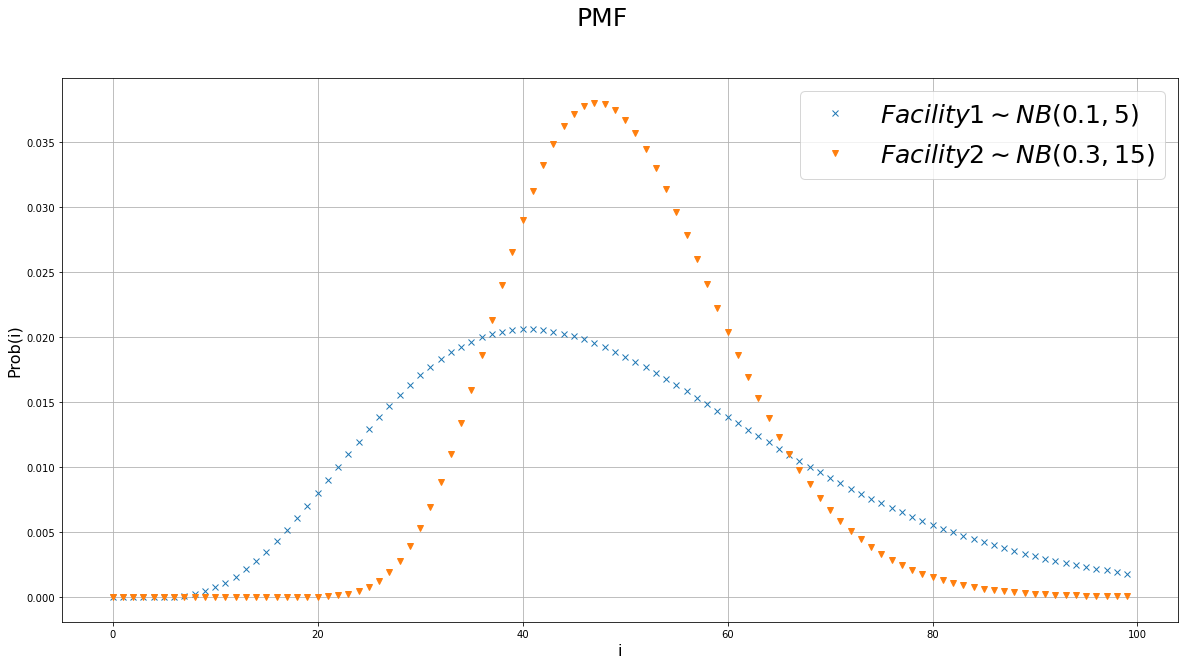

Facility1_mean:50.0, Facility1_var:450.0 
Facility2_mean:50.0, Facility2_var:116.66666666666667
We can also see the means are equal but var1>var2, meaning the probabilty is more 'spread out'.
This stands in line with our result : In order to reach a success rate of 85% we are required a larger batch.
It is clearly visible in our CDF plot as Facility2 in above Facility1 past the mean point.


In [19]:
y1 = prob1.pmf([x for x in i])
y2 = prob2.pmf([x for x in i])
plt.figure(figsize=(20,10))
plt.suptitle("PMF", fontsize="25")
plt.ylabel("Prob(i)",fontsize="16")
plt.xlabel("i",fontsize="16")
plt.plot(i,y1,'x',label="$Facility1 \sim NB(0.1,5)$" )
plt.plot(i,y2,'v', label="$Facility2 \sim NB(0.3,15)$")
plt.legend(fontsize="25")
plt.grid()
plt.show()
mean1 = prob1.mean()
mean2 = prob2.mean()
var1 = prob1.var()
var2 = prob2.var()
print("Facility1_mean:{}, Facility1_var:{} \nFacility2_mean:{}, Facility2_var:{}".format(mean1,var1,mean2,var2))
print ("We can also see the means are equal but var1>var2, meaning the probabilty is more 'spread out'.\nThis stands in line with our result : In order to reach a success rate of 85% we are required a larger batch.\nIt is clearly visible in our CDF plot as Facility2 in above Facility1 past the mean point.")

### Section 2 - Rent distributions in Randomistan

Stochastic HeightsThe state of Randomistan conducted a survey to study the distribution of rent paid in two neighboring towns, Stochastic Heights and Random Grove, to be denoted SH and RG.<br> 

Here are some findings of the survey:
* The population of SH and RG is 16,000 and 22,000 respectively. <br>
* The mean rent in SH and RG is 6300RCU and 4200RCU respectively.
* The median rent is 4600RCU in both towns.
* The IQR of the rent is smaller in SH than in RG.

All data generated in this question needs to be consistent with these findings.

#### 2.A
Draw histograms that describe 2 different scenarii of possible distributions of rent in the two towns.Your histograms should:<br>
* Use bins of 100RCU each.
* Have at least 10 non zero bins.

SH1 population: 16000, SH1 Median:4600.0, SH1 Mean:6300.0, SH1 IQR:5200.0
RG1 population:22000, RG1 Median:4600.0, RG1 Mean:4200.0, RG1 IQR:7700.0 

SH2 population: 16000, SH2 Median:4600.0, SH2 Mean:6300.0, SH2 IQR:4900.0
RG2 population:22000, RG2 Median:4600.0, RG2 Mean:4200.0, RG2 IQR:7000.0


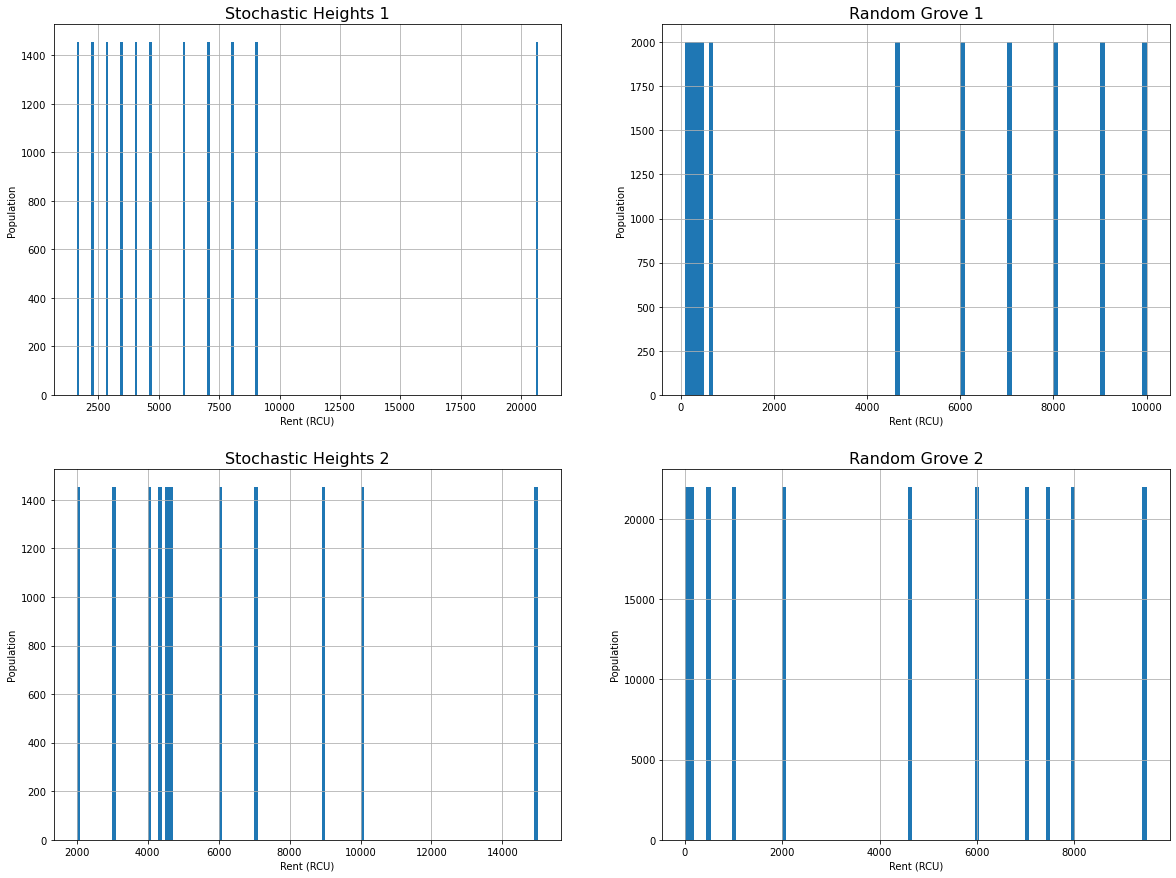

In [20]:
import random
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

SH1_rent = [1600,2200,2800,3400,4000,4600,6000,7000,8000,9000,20700]
SH1_population= 16000
SH1 = np.repeat(SH1_rent,SH1_population//11)
SH1_median = np.median(SH1)
SH1_mean = np.mean(SH1)
SH1_iqr = np.percentile(SH1,75) - np.percentile(SH1,25)
print("SH1 population: {}, SH1 Median:{}, SH1 Mean:{}, SH1 IQR:{}".format(SH1_population,SH1_median,SH1_mean, SH1_iqr))

RG1_rent = [100,200,300,400,600,4600,6000,7000,8000,9000,10000]
RG1_population = 22000
RG1 = np.repeat(RG1_rent,RG1_population//11)
RG1_median = np.median(RG1)
RG1_mean = np.mean(RG1)
RG1_iqr = np.percentile(RG1,75) - np.percentile(RG1,25)
print("RG1 population:{}, RG1 Median:{}, RG1 Mean:{}, RG1 IQR:{} \n".format(RG1_population, RG1_median,RG1_mean, RG1_iqr))

SH2_rent = [2000,3000,4000,4300,4500,4600,6000,7000,8900,10000,15000]
SH2_population = 16000
SH2 = np.repeat(SH2_rent,SH2_population//11)
SH2_median = np.median(SH1)
SH2_mean = np.mean(SH1)
SH2_iqr = np.percentile(SH2,75)-np.percentile(SH2,25)
print("SH2 population: {}, SH2 Median:{}, SH2 Mean:{}, SH2 IQR:{}".format(SH2_population,SH2_median,SH2_mean, SH2_iqr))

RG2_rent = [10,100,500,1000,2000,4600,6000,7000,7500,8000,9490]
RG2_population = 22000
RG2 = np.repeat(RG2_rent,RG2_population)
RG2_median = np.median(RG2)
RG2_mean = np.mean(RG2)
RG2_iqr = np.percentile(RG2,75) - np.percentile(RG2,25)
print("RG2 population:{}, RG2 Median:{}, RG2 Mean:{}, RG2 IQR:{}".format(RG2_population, RG2_median,RG2_mean, RG2_iqr))

fig, ax = plt.subplots(2, 2, figsize=(20, 15))
ax[0][0].grid()
ax[0][0].hist(SH1, bins=191)
ax[0][0].set_xlabel('Rent (RCU)')
ax[0][0].set_ylabel('Population')
ax[0][0].set_title('Stochastic Heights 1',fontsize="16")
ax[0][1].hist(RG1, bins=99)
ax[0][1].grid()
ax[0][1].set_xlabel('Rent (RCU)')
ax[0][1].set_ylabel('Population')
ax[0][1].set_title('Random Grove 1',fontsize="16")
ax[1][0].hist(SH2,bins=130)
ax[1][0].grid()
ax[1][0].set_xlabel('Rent (RCU)')
ax[1][0].set_ylabel('Population')
ax[1][0].set_title('Stochastic Heights 2',fontsize="16")
ax[1][1].hist(RG2,bins=110)
ax[1][1].grid()
ax[1][1].set_xlabel('Rent (RCU)')
ax[1][1].set_ylabel('Population')
ax[1][1].set_title('Random Grove 2',fontsize="16")
plt.show()

#### 2.B
Draw a histogram of a third scenario with the same properties. <br>
In addition, in this scenario the rent in SH should have a higher variance than the rent in RG.

SH3 population: 16000, SH3 Median:4600.0, SH3 Mean:6300.0, SH3 IQR:5200.0, SH3 Var: 26336363.636363637
RG1 population:22000, RG1 Median:4600.0, RG1 Mean:4200.0, RG1 IQR:7700.0, RG3 Var: 14434090.909090908


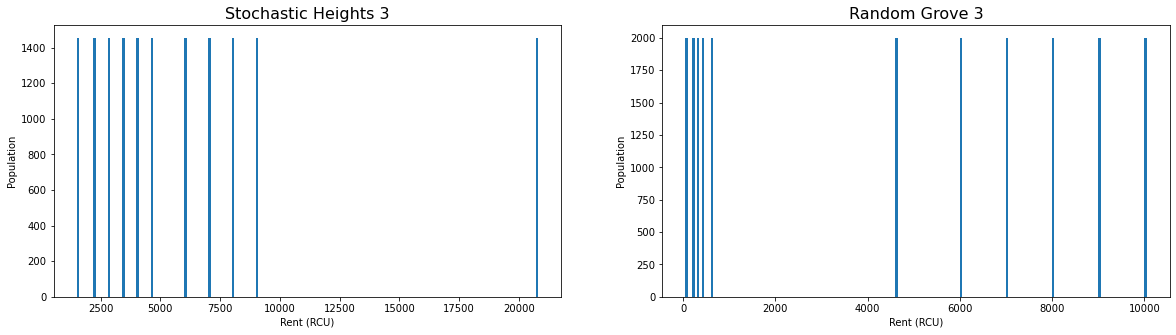

In [21]:
SH3_rent = [1500,2200,2800,3400,4000,4600,6000,7000,8000,9000,20800]
SH3_population= 16000
SH3 = np.repeat(SH3_rent,SH3_population//11)
SH3_median = np.median(SH3)
SH3_mean = np.mean(SH3)
SH3_iqr = np.percentile(SH3,75) - np.percentile(SH3,25)
SH3_var = np.var(SH3)
print("SH3 population: {}, SH3 Median:{}, SH3 Mean:{}, SH3 IQR:{}, SH3 Var: {}".format(SH3_population,SH3_median,SH3_mean, SH3_iqr, SH3_var))

RG3_rent = [50,200,300,400,600,4600,6000,7000,8000,9000,10050]
RG3_population = 22000
RG3 = np.repeat(RG3_rent,RG3_population//11)
RG3_median = np.median(RG3)
RG3_mean = np.mean(RG3)
RG3_iqr = np.percentile(RG3,75) - np.percentile(RG3,25)
RG3_var = np.var(RG3)
print("RG1 population:{}, RG1 Median:{}, RG1 Mean:{}, RG1 IQR:{}, RG3 Var: {}".format(RG1_population, RG1_median,RG1_mean, RG1_iqr, RG3_var))

fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].hist(SH3, bins=193)
ax[0].set_xlabel('Rent (RCU)')
ax[0].set_ylabel('Population')
ax[0].set_title('Stochastic Heights 3',fontsize=16)
ax[1].hist(RG3, bins=200)
ax[1].set_xlabel('Rent (RCU)')
ax[1].set_ylabel('Population')
ax[1].set_title('Random Grove 3',fontsize=16)
plt.show()

The survey also examined the per household income (PHI) in these two places.<br>

It found that:<br>
* The mean of PHI in SH is 12500 and in RG is 8500.
* The median is 12000 in SH and 8000 in RG.
* The covariance of the rent and the PHI was observed to be as in the formula below with $\alpha=97\%$ and $\alpha=89\%$ in SH and in RG respectively.<br><br>
$$Cov(rent, PHI) = \alpha * \sqrt{Var(rent)} * \sqrt{Var(PHI)}$$

#### 2.C
Produce rent and PHI data for the two cities, that is consistent with these findings. The covariances in your data can deviate by up to 1% from the numbers given $\alpha$.

In [22]:
import math
SH1_income = [1000,4000,8000,9500,10000,12000,13000,14000,15000,16000,35000]
SH1_phi = np.repeat(SH1_income,SH1_population//11)
SH1_phi_mean = np.mean(SH1_phi)
SH1_phi_median = np.median(SH1_phi)
SH1_var = np.var(SH1)
SH1_phi_var = np.var(SH1_phi)
print("SH1 population:{}, SH1 Median:{}, SH1 Mean:{}, SH1 IQR:{}, SH1 Var: {}".format(SH1_population,SH1_median,SH1_mean, SH1_iqr,SH1_var))
print("SH1 phi mean:{}, SH1 phi median:{}, SH1 phi var:{}".format(SH1_phi_mean,SH1_phi_median, SH1_phi_var))
cov1 = np.cov(SH1,SH1_phi)[0][1]
survey1 = (math.sqrt(SH1_var)*math.sqrt(SH1_phi_var))
alpha1 = 0.97
Deviation1 = (cov1/survey1)/alpha1
print("Deviation between data to alpha in SH is {} (less than 1%)\n".format(Deviation1))

RG1_income = [1500,3500,5500,6500,7500,8000,9000,10000,10500,11000,15000]
RG1_phi = np.repeat(RG1_income,RG1_population//11)
RG1_phi_mean = np.mean(RG1_phi)
RG1_phi_median = np.median(RG1_phi)
RG1_var = np.var(RG1)
RG1_phi_var = np.var(RG1_phi)
print("RG1 population:{}, RG1 Median:{}, RG1 Mean:{}, RG1 IQR:{}, RG1 Var: {}".format(RG1_population,RG1_median,RG1_mean, RG1_iqr,RG1_var))
print("RG1 phi mean:{}, RG1 phi median:{}, RG1 phi var:{}".format(RG1_phi_mean,RG1_phi_median, RG1_phi_var))
cov2 = np.cov(RG1,RG1_phi)[0][1]
survey2 = (math.sqrt(RG1_var)*math.sqrt(RG1_phi_var))
alpha2 = 0.89
Deviation2 = (cov2/survey2)/alpha2
print("Deviation between data to alpha in RG is {} (less than 1%)".format(Deviation2))


SH1 population:16000, SH1 Median:4600.0, SH1 Mean:6300.0, SH1 IQR:5200.0, SH1 Var: 25987272.727272727
SH1 phi mean:12500.0, SH1 phi median:12000.0, SH1 phi var:69772727.27272727
Deviation between data to alpha in SH is 1.0093138463352735 (less than 1%)

RG1 population:22000, RG1 Median:4600.0, RG1 Mean:4200.0, RG1 IQR:7700.0, RG1 Var: 14343636.363636363
RG1 phi mean:8000.0, RG1 phi median:8000.0, RG1 phi var:12772727.272727273
Deviation between data to alpha in RG is 1.0097682472024936 (less than 1%)


#### 2.D
Produce two heatmaps that describe these two bivariate joint distributions. Make sure you carefully consider the selected binning resolution.

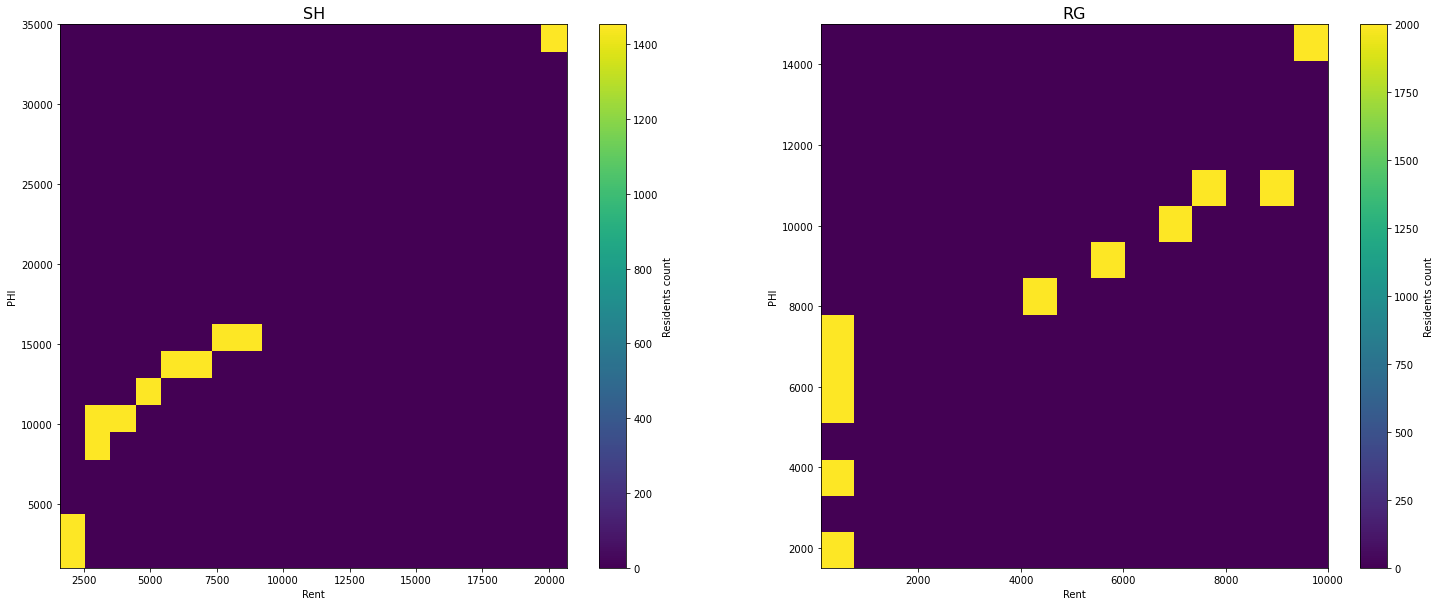

We can clearly see the difference in covariance in RG as it is less liniar than SH.


In [23]:

fig, ax = plt.subplots(1, 2, figsize=(25, 10))
h1=ax[0].hist2d(x=SH1,y=SH1_phi,bins=20)
ax[0].set_ylabel('PHI')
ax[0].set_xlabel('Rent')
ax[0].set_title('SH',fontsize=16)
fig.colorbar(h1[3],ax=ax[0],label="Residents count")
h2=ax[1].hist2d(x=RG1,y=RG1_phi,bins=15)
ax[1].set_ylabel('PHI')
ax[1].set_xlabel('Rent')
ax[1].set_title('RG',fontsize=16)
fig.colorbar(h2[3],ax=ax[1],label="Residents count")
plt.show()
print("We can clearly see the difference in covariance in RG as it is less liniar than SH.")

### Section 3 - Multinomial Distributions

1. Let $X \sim Multinomial(n,\vec{p})$ be a multinomial random variable where $n=20$ and $\vec{p} = (0.2,  0.1,  0.1,  0.1,  0.2,  0.3)$. Note that X is a vector of counts.


2. Let $Y = X_2 + X_3 + X_4$ be a random variable.


3. Create $k=100$ experiments where $X$ is sampled using Python. Calculate the empirical centralized third moment of $Y$ based on your $k$ experiments.


4. Compare your result to the calculation in class for the centralized third moment of the **binomial** distribution and explain your observation.

In [24]:
import numpy as np
from scipy.stats import moment
from scipy.stats import rv_discrete

# samples X and calculates the value of Y
def SampleY():
    a = [0,1,2,3,4,5]
    p = [0.2,0.1,0.1,0.1,0.2,0.3]
    
    # create X distribution
    dist = rv_discrete(values=(a, p))
    
    # sample X 20 times
    exp = dist.rvs(size = 20)
    
    # create vector X as the counts of the frequencies of each category in a
    X = [np.count_nonzero(exp == x) for x in a]
    
    # calculate Y by Y = X2 + X3 + X4 
    y = X[2] + X[3] + X[4]
    return y

k = 100
yDist = np.array([SampleY() for i in range(k)])
cntrl_3rd_moment = moment(yDist, moment = 3)

print(f"The empirical centralized third moment of 𝑌 : {cntrl_3rd_moment}")

The empirical centralized third moment of 𝑌 : -0.577878


#### Explenation to section 3

$Y \sim Bin(20, 0.4)$

* Note - by convention, we regard the starting index of  $\vec{p}$ from $0$. Therefor  $P_y = P(X_2 + X_3 + X_4) = 0.1 + 0.1 + 0.2 = 0.4$

As seen in class, the centralized 3rd moment of $X \sim Bin(n,p)$ equals n * p * (1-p) * (1-2p)

Therefor, the centralized 3rd moment of Y is : 20 * 0.4 * 0.6 * 0.2 = 0.96

The reason that the result of our calculation is different from the result of the formula, is because our calculation is based on the actual RVs values, which are changing between executions, while the formula is constant. Moreover, since the calculation of third moment includes the exponent of 3 of the distances between each observation and the Total Mean, some of the results are negative, while some are positive. 

### Section 4 - Covariance and independence

What is the variance of the sum X +Y + Z of three random variables in terms of the variances of X, Y and Z and the covariances between each pair of random variables? What happens if X,Y,Z are pairwise independent? If X,Y,Z are pairwise independent, are they necessarily collectively independent? Prove your answer.

***Answer:*** <br>

We learned at class that <centered>$$ VAR(X,Y)=VAR(X)+VAR(Y)+2COV(X+Y) $$</centered><br>
We assume X,Y,Z are independant, therefore  $E(XY)=E(X)E(Y), E(X+Y)=E(X)+E(Y) $ for any pair <br><br>

Lets assume W=Y+Z <br>
VAR(X+W) = VAR(X)+VAR(W)+2COV(X,W) <br>
**COV(X,W)** = E(XW)-E(X)E(W) = E(X(Y+Z))-E(X)E(Y+Z) = *E(X)E(Y)*+E(X)E(Z)-*E(X)E(Y)*-E(X)E(Z) = COV(X,Y)+COV(X,Z) <br>
Then : <br>
VAR(X+W) = VAR(X)+VAR(Y+Z))+2**COV(X,W)** = VAR(X)+VAR(Y)+VAR(Z)+2COV(Y,Z)+2COV(X,Y)+2COV(X,Z)

If X,Y,Z are pairwise independant than for any pair $COV(X,Y)=0$, therefore the Variance of the sum would be the sum of variences.<br>

Let X,Y,Z be pairwise independant, this does not neccesarily mean they are collectivley independant.<br>
We can show this using an example:<br>
$X,Y$ ~ $B(0.5)$<br>
$Z$ ~ $XOR(X,Y)$<br>
The pair X,Y are independant.<br>
For any X, Z has a 50% chance being 1 or 0, meaning Z is independant of X.<br>
For any Y, Z has a 50% chance of being 1 or 0, meaning Z is independant of Y.<br>
So X,Y,Z are pairwise independant but not collectivley independant since Z in dependant on (X,Y)






### Section 5 - Convolutions

#### 5.A
Write a program, `Q = NFoldConv(P , n)`, that takes as input:
* A distribution, P, of a random variable that takes finitely many integer values
* An integer n

and produces the distribution, Q, of the sum of n independent repeats of random variables, each of which has the distribution P.

In [25]:
import numpy as np;

# calculates the probabilty to get a summation of value <summation> by summing n rvs from distribution p
def CalcProb(summation, n, p_probs, cache):
    
    # first try to retreive the probability from the cache
    if(cache.get((n, summation)) != None):
        return cache.get((n, summation));
    
    probability = 0;
    
    # If n = 1 the return the probability to get the value from distibution P
    if n == 1:
        probability = p_probs.get(summation); 
        cache[(n, summation)] = probability;
        return (0 if probability == None else probability);
    
    for val in p_probs.keys():
        # sum all probabilities to sample x AND sampling n-1 items that sum up to (summation - x)
        probability += p_probs.get(val) * CalcProb(summation - val, n-1, p_probs, cache); 
    
    cache[(n, summation)] = probability;
    # print(f'The probability to get summation {summation} in {n} experiment is {probability}');
    return probability;

def NFoldConv(P , n):
   # prepare a dictionary for distribution p where each value is mapped with it's probability
    unique, counts = np.unique(P, return_counts=True);
    p_probs = dict(zip(unique, counts/ P.size));

    # prepare a dictionary for distribution Q where each value is mapped with it's probability
    minval = np.min(unique) * n;
    maxval = np.max(unique) * n;
    
    # create the array of all possible values [minVal ... MaxVal]
    possibleValues = np.arange(maxval - minval + 1 ) + minval;
    Qdist = {};
    
    # use caching to avoid reocuuring calculations
    cache = {};

    for value in possibleValues:
        Qdist[value] = CalcProb(value, n, p_probs, cache);
    
    return Qdist;

NFoldConv(np.arange(6) + 1, 2);


#### 5.B
Compute the distribution of the sum of the results of rolling a fair octahedron 17 times.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/Octahedron.jpg" width="200">


In [26]:
p = np.arange(8) + 1
print(NFoldConv(p, 17))

{17: 4.440892098500626e-16, 18: 7.549516567451064e-15, 19: 6.794564910705958e-14, 20: 4.303224443447107e-13, 21: 2.1516122217235534e-12, 22: 9.036771331238924e-12, 23: 3.313482821454272e-11, 24: 1.088715784192118e-10, 25: 3.2660718574106795e-10, 26: 9.07134811711785e-10, 27: 2.3577291230481023e-09, 28: 5.782673007104222e-09, 29: 1.3473395732432891e-08, 30: 2.998400727705075e-08, 31: 6.401734875538523e-08, 32: 1.3161584089260714e-07, 33: 2.613809253482202e-07, 34: 5.027422242953605e-07, 35: 9.38663699212583e-07, 36: 1.7045993589981379e-06, 37: 3.015970226893927e-06, 38: 5.206881849684208e-06, 39: 8.783168114145923e-06, 40: 1.449303744882613e-05, 41: 2.3418493098503745e-05, 42: 3.7090165106334894e-05, 43: 5.762708941681183e-05, 44: 8.790117605705916e-05, 45: 0.00013172354057466862, 46: 0.0001940465160554794, 47: 0.000281171099826949, 48: 0.00040094502474907756, 49: 0.0005629319236253316, 50: 0.0007785276598544222, 51: 0.0010609964316725673, 52: 0.0014253974040241424, 53: 0.00188837307845